In [3]:
pip install catboost

     |████████████████████████████████| 12.9 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 23.9 MB 3.0 MB/s eta 0:00:01    |███████▉                        | 5.8 MB 8.5 MB/s eta 0:00:03
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

     |████████████████████████████████| 1.2 MB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikitplot.metrics

ERROR: Could not find a version that satisfies the requirement scikitplot.metrics
ERROR: No matching distribution found for scikitplot.metrics
Note: you may need to restart the kernel to use updated packages.


In [4]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import RFECV, RFE
import numpy as np
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
##from xgboost import XGBClassifier
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
##from scikitplot.metrics import plot_roc
##from scikitplot.metrics import plot_precision_recall

In [5]:
import matplotlib.pyplot as plt

In [6]:
# import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('US_Accidents_Dec20_updated.csv')

In [47]:
pd.set_option('max_column', None)

In [49]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


### Analisis Geográfico

#### Accidentes por pais

In [50]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install descartes

In [51]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point,Polygon
import descartes

In [52]:
loc_map=df.groupby(['Start_Lat','Start_Lng']).count().reset_index().sort_values(by = "ID",ascending=False).iloc[:,0:3]
loc_map=loc_map

In [ ]:
loc_map

In [ ]:
geometria = gpd.points_from_xy(loc_map.Start_Lng, loc_map.Start_Lat)
gdf = GeoDataFrame(loc_map, geometry=geometria)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=world[world.name == 'United States of America']

gdf.plot(ax=ax.plot(figsize=(12, 10), color='white', edgecolor='black'), markersize=0.1, legend = True)
plt.show()

### Analisis por severidad

Text(0.5, 1.0, 'Distribución de accidentes por severidad')

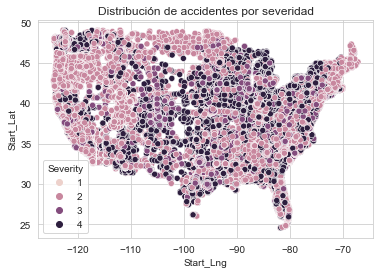

In [249]:
sns.set_style("whitegrid")
sns.scatterplot(x="Start_Lng", y="Start_Lat", hue='Severity', data=df).set_title('Distribución de accidentes por severidad')

In [250]:
df_year = pd.to_datetime(df.Start_Time)

#### Analisis por estados

In [216]:
estados = df.groupby('State').count().reset_index()

In [217]:
estados_sort=estados.sort_values(by = "ID",ascending=False)
estados_sort_top25 = estados_sort.head(25)

[Text(0.5, 0, 'Cantidad de Accidentes'), Text(0, 0.5, 'Estado')]

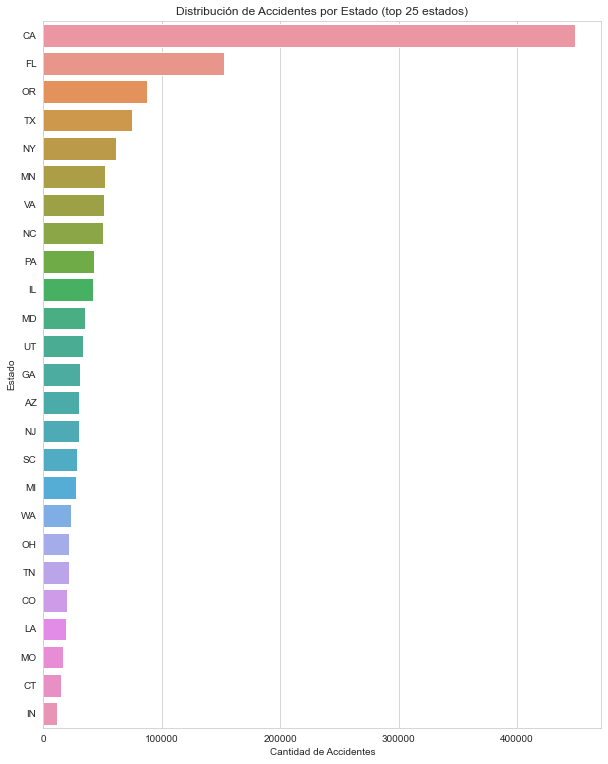

In [262]:
fig, ax = plt.subplots(figsize=(10, 13))
plt.title("Distribución de Accidentes por Estado (top 25 estados)")
sns.barplot(y="State", x="ID",data=estados_sort_top25).set(xlabel = 'Cantidad de Accidentes', ylabel= 'Estado')

#### Analisis por regiones de california

In [261]:
california =df.groupby('State').get_group('CA').groupby('City').count().reset_index() \
.sort_values(by = "ID",ascending=False)
california=california.head(15)

[Text(0.5, 0, 'Cantidad de Accidentes'), Text(0, 0.5, 'Ciudad')]

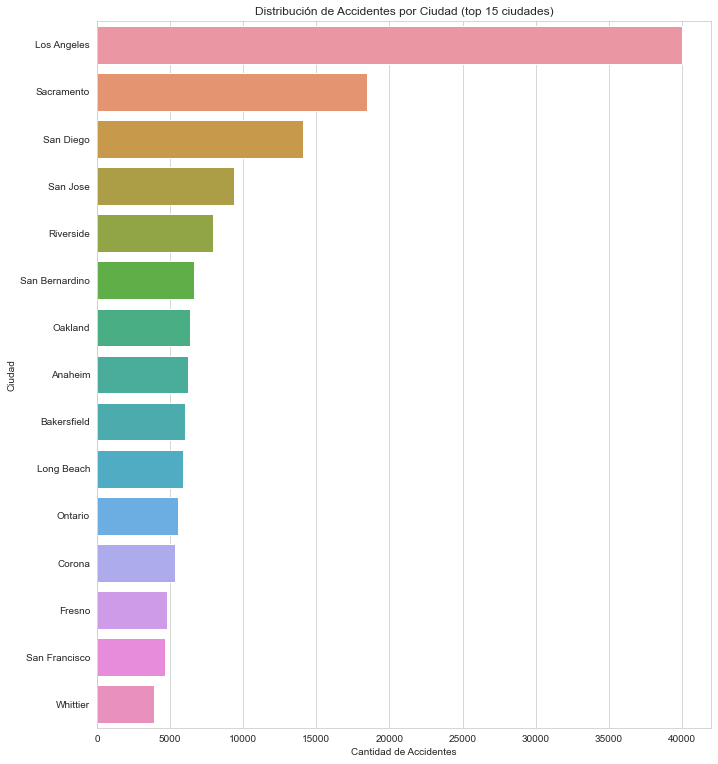

In [259]:
fig, ax = plt.subplots(figsize=(11, 13))
plt.title("Distribución de Accidentes por Ciudad (top 15 ciudades)")
sns.barplot(y="City", x="ID",data=california_top15).set(xlabel = 'Cantidad de Accidentes', ylabel= 'Ciudad')

Text(0.5, 1.0, 'Distribución de accidentes por severidad (Estado de California)')

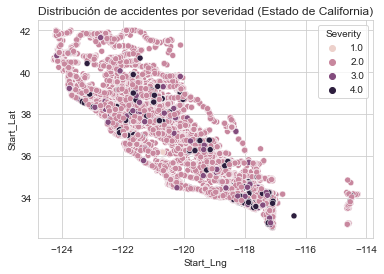

In [268]:
df_CA = df.where(df['State'] == 'CA').dropna()

sns.set_style("whitegrid")
sns.scatterplot(x="Start_Lng", y="Start_Lat", hue='Severity', data=df_CA).set_title('Distribución de accidentes por severidad (Estado de California)')

### Analisis temporal

#### Analisis por año

In [208]:
year = pd.to_datetime(df.Start_Time)
year = df.groupby([year.dt.year]).count().iloc[:,[0]]
year = year.reset_index()

In [209]:
year = year.sort_values(by = "Start_Time",ascending=False)

In [210]:
year

,Start_Time,ID
4,2020,787932
3,2019,261772
2,2018,166936
1,2017,170099
0,2016,129325


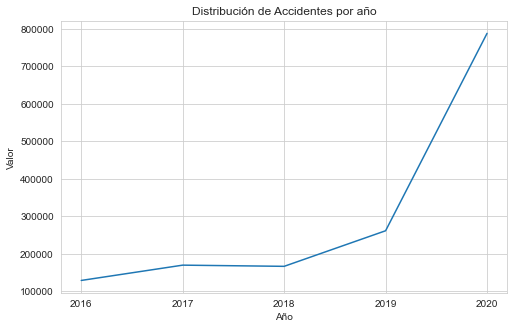

In [254]:
fig, ax = plt.subplots(figsize=(8, 5))
x=year.Start_Time
y=year.ID
plt.plot(x , y)
plt.title("Distribución de Accidentes por año")
plt.xticks([2016,2017,2018,2019,2020])
plt.xlabel("Año")
plt.ylabel("Valor")
plt.show()

Text(0.5, 1.0, 'Distribución de accidentes por severidad (Año 2019)')

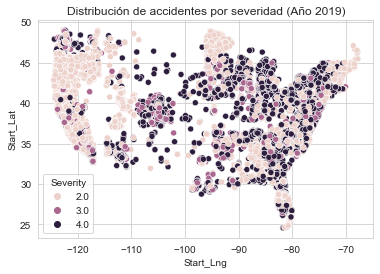

In [251]:
df_19 = df.where(df_year.dt.year == 2019).dropna()

sns.set_style("whitegrid")
sns.scatterplot(x="Start_Lng", y="Start_Lat", hue='Severity', data=df_19).set_title('Distribución de accidentes por severidad (Año 2019)')

Text(0.5, 1.0, 'Distribución de accidentes por severidad (Año 2020)')

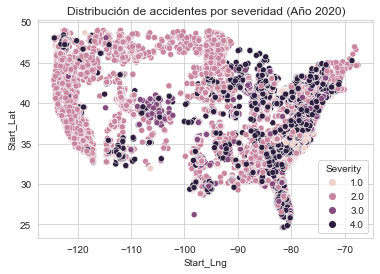

In [266]:
df_20 = df.where(df_year.dt.year == 2020).dropna()
sns.set_style("whitegrid")
sns.scatterplot(x="Start_Lng", y="Start_Lat", hue='Severity', data=df_20).set_title('Distribución de accidentes por severidad (Año 2020)')

#### Analisis por mes

In [91]:
mes = pd.to_datetime(df.Start_Time)
mes = df.groupby([mes.dt.month]).count().iloc[:,[0]]
mes = mes.reset_index()

In [128]:
mes

,Start_Time,ID
0,1,88540
1,2,82419
2,3,96802
3,4,107007
4,5,108195
5,6,113048
6,7,53650
7,8,62903
8,9,122906
9,10,181074


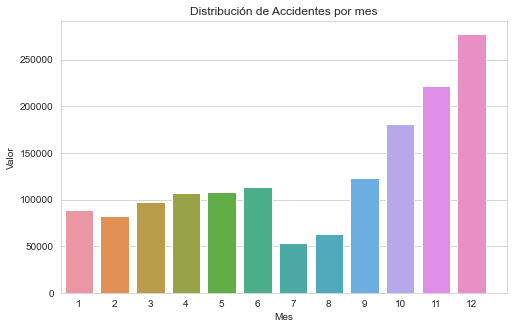

In [253]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Distribución de Accidentes por mes")
sns.barplot(x='Start_Time',y='ID',data=mes)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Mes")
plt.ylabel("Valor")
plt.show()

#### Analisis por hora

In [99]:
horas = pd.to_datetime(df.Start_Time)
horas = df.groupby([horas.dt.hour]).count().iloc[:,[0]]
horas = horas.reset_index()

In [129]:
horas

,Start_Time,ID
0,0,46125
1,1,43434
2,2,38801
3,3,32175
4,4,29478
5,5,40105
6,6,57859
7,7,73938
8,8,75802
9,9,59744


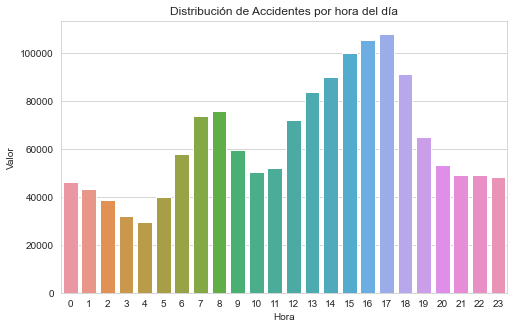

In [252]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Distribución de Accidentes por hora del día")
sns.barplot(x='Start_Time',y='ID',data=hora)
plt.xlabel("Hora")
plt.ylabel("Valor")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.show()

### Analisis por condicion climática

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


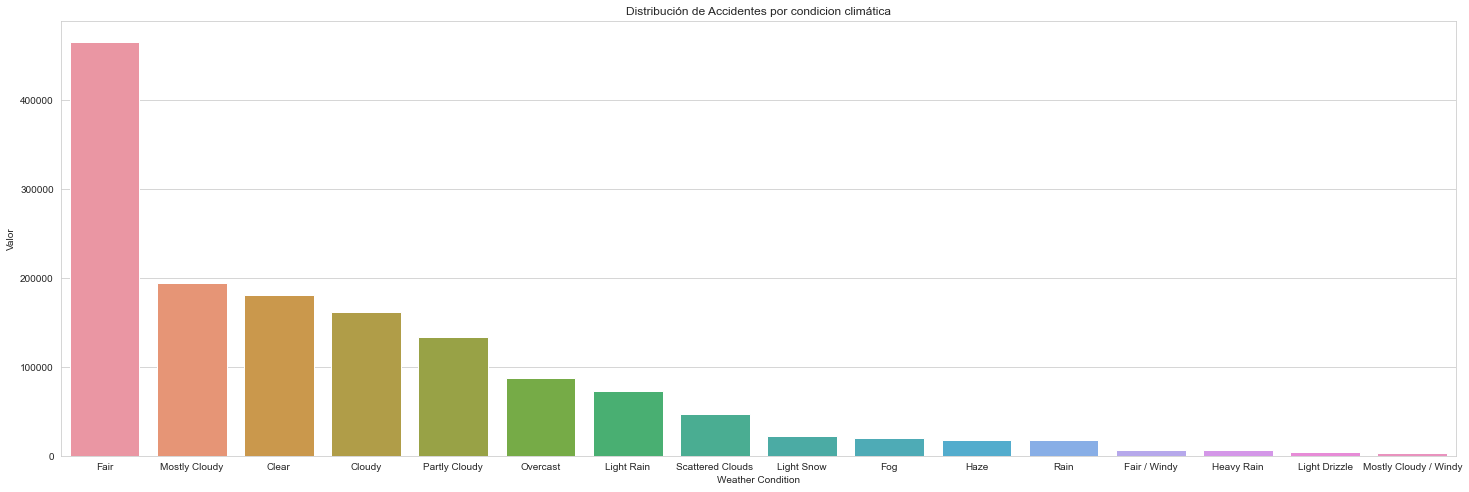

In [293]:
counts = df["Weather_Condition"].value_counts()
counts = counts.head(16)
plt.figure(figsize=(25, 8))
plt.title("Distribución de Accidentes por condicion climática")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Valor")
plt.show()

### Severidad segun condicion climatica

#### Despejado

In [321]:
mask = (df['Weather_Condition'] == 'Fair') | (df['Weather_Condition'] == 'Clear')

In [322]:
df_Fair = df[mask]
counts = df_Fair["Severity"].value_counts()
porc = round(counts/counts.sum()*100, 1)
porc

2    82.3
3     8.6
4     7.0
1     2.2
Name: Severity, dtype: float64

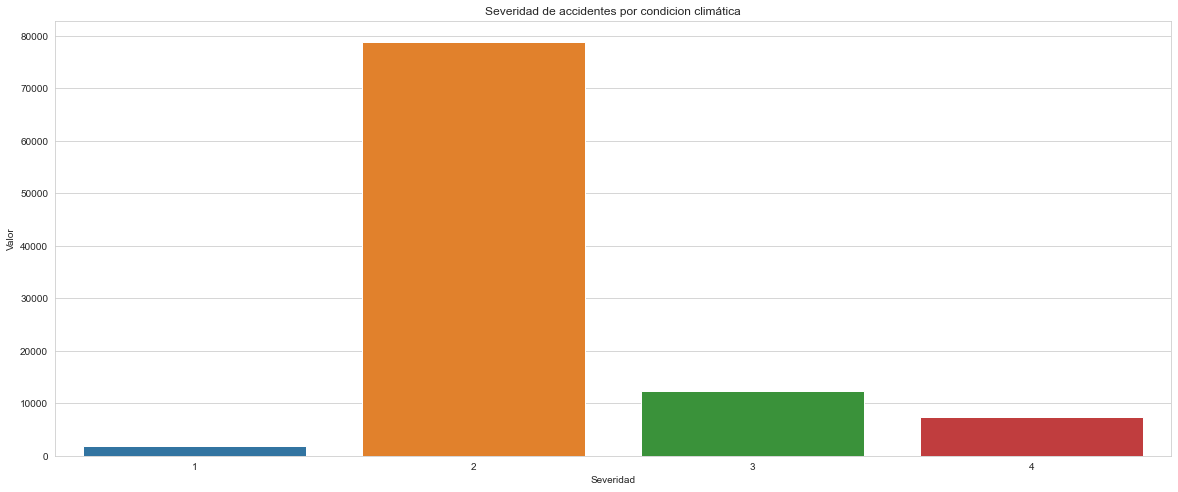

In [325]:
counts = df_Rain["Severity"].value_counts()
plt.figure(figsize=(20, 8))
plt.title("Severidad de accidentes por condicion climática")
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Severidad")
plt.ylabel("Valor")
plt.show()

#### Nublado

In [342]:
mask = (df['Weather_Condition'] == 'Cloudy') | \
(df['Weather_Condition'] == 'Partly Cloudy') | \
(df['Weather_Condition'] == 'Overcast') | \
(df['Weather_Condition'] == 'Scattered Clouds')

In [343]:
df_Cloud = df[mask]
counts = df_Cloud["Severity"].value_counts()
porc = round(counts/counts.sum()*100, 1)
porc

2    77.5
3    12.5
4     8.5
1     1.4
Name: Severity, dtype: float64

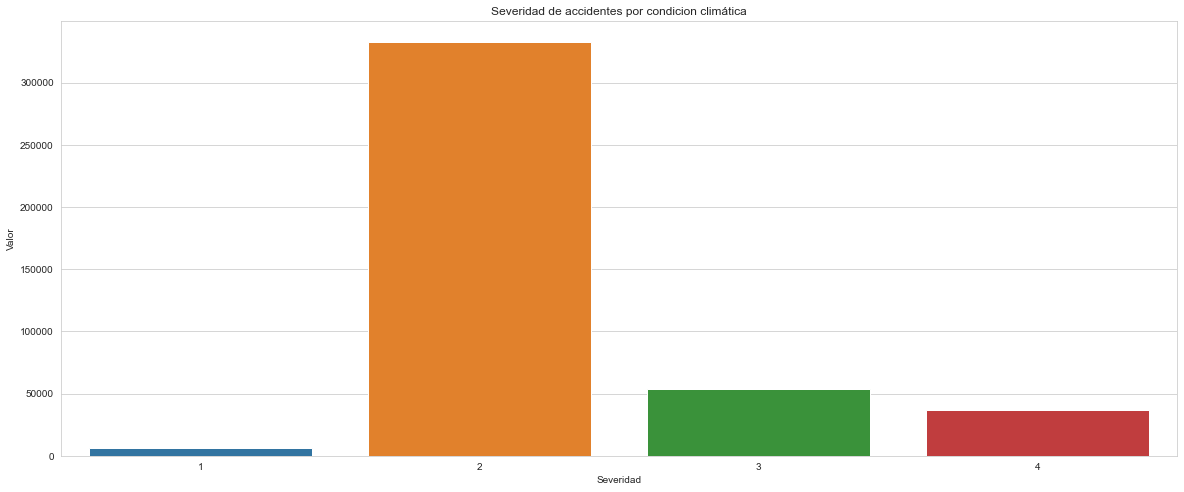

In [344]:
plt.figure(figsize=(20, 8))
plt.title("Severidad de accidentes por condicion climática")
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Severidad")
plt.ylabel("Valor")
plt.show()

#### Lluvioso

In [348]:
mask = (df['Weather_Condition'] == 'Light Rain') | \
(df['Weather_Condition'] == 'Rain') | \
(df['Weather_Condition'] == 'Light Drizzle') | \
(df['Weather_Condition'] == 'Heavy Rain')

In [349]:
df_Rain = df[mask]
counts = df_Rain["Severity"].value_counts()
porc = round(counts/counts.sum()*100, 1)
porc

2    78.6
3    12.3
4     7.3
1     1.8
Name: Severity, dtype: float64

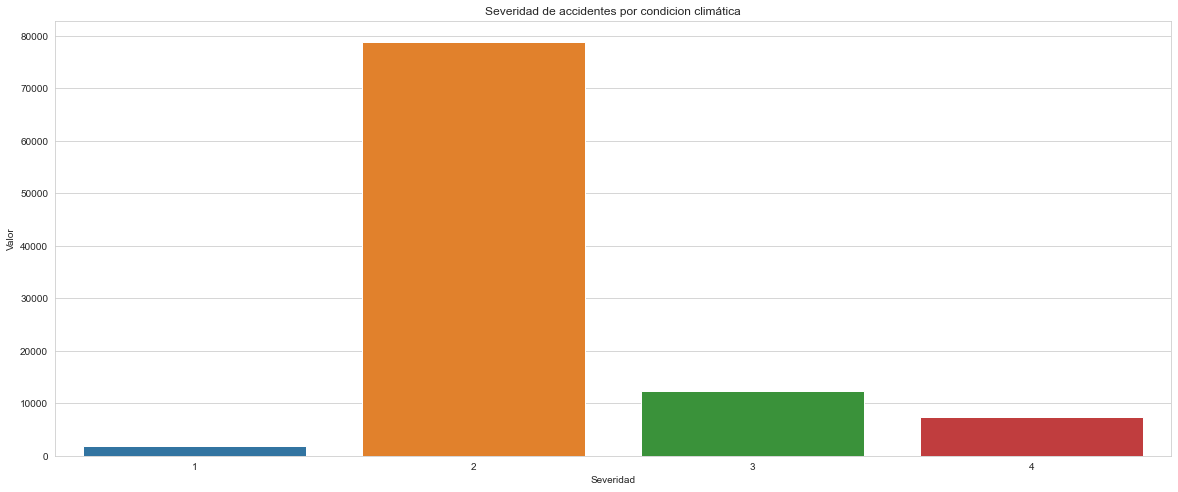

In [350]:
plt.figure(figsize=(20, 8))
plt.title("Severidad de accidentes por condicion climática")
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Severidad")
plt.ylabel("Valor")
plt.show()

#### Nieve

In [351]:
mask = (df['Weather_Condition'] == 'Light Snow') | \
(df['Weather_Condition'] == 'Snow')

In [352]:
df_Rain = df[mask]
counts = df_Rain["Severity"].value_counts()
porc = round(counts/counts.sum()*100, 1)
porc

2    75.5
3    12.2
4    12.0
1     0.4
Name: Severity, dtype: float64

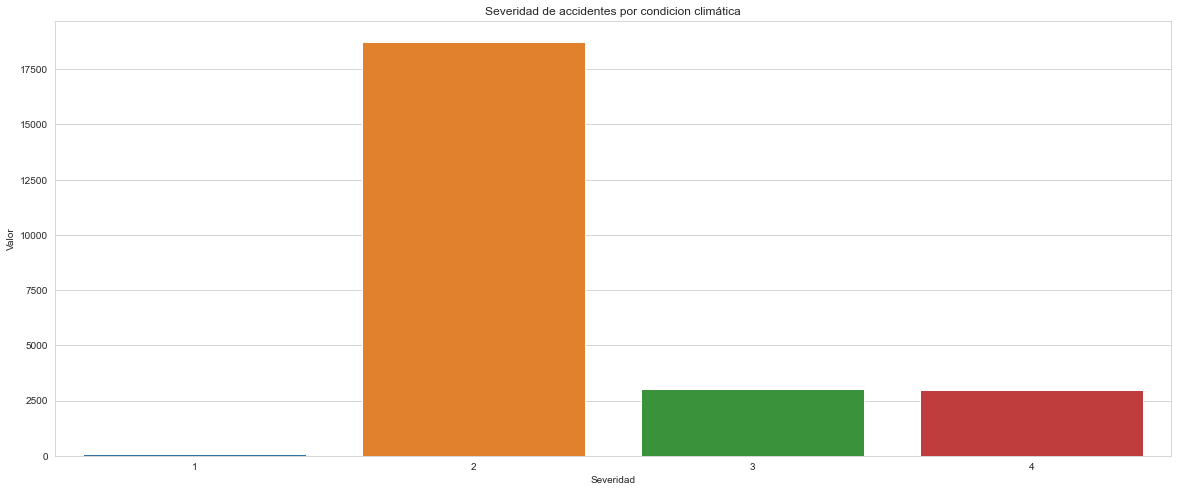

In [353]:
plt.figure(figsize=(20, 8))
plt.title("Severidad de accidentes por condicion climática")
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Severidad")
plt.ylabel("Valor")
plt.show()